In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 

In [2]:
plt.style.use("seaborn")

## Data Preparation

In [10]:
mean_01 = np.array([1.0,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print(dist_01.shape, dist_02.shape)

(500, 2) (500, 2)


## Data Visualization

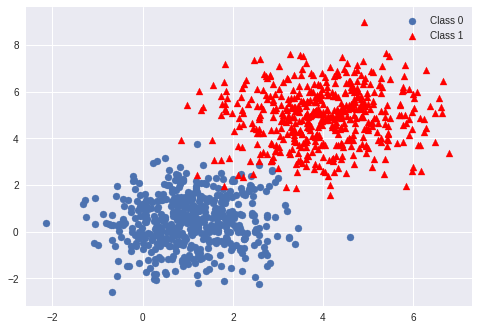

In [12]:
plt.scatter(dist_01[:,0], dist_01[:,1], label="Class 0")
plt.scatter(dist_02[:,0], dist_02[:,1], label="Class 1", color="red", marker="^")
plt.legend()
plt.show()

## Create Training and Test Set

In [37]:
from sklearn.model_selection import train_test_split
data = np.zeros((1000,3))
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1
np.random.shuffle(data)
print(data[:5,:])

train, test = train_test_split(data, test_size=0.2)
X_train = train[:,:2]
Y_train = train[:, -1]
X_test = test[:,:2]
Y_test = test[:,-1]
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

[[ 5.77534063  6.07800031  1.        ]
 [ 0.67776717  0.83085289  0.        ]
 [ 5.11087286  5.4548313   1.        ]
 [ 4.11553477  4.76869117  1.        ]
 [ 0.76887049  1.30441111  0.        ]]
(800, 2) (200, 2)
(800,) (200,)


## Logistic Regression Functions

In [71]:
def hypothesis(x,w,b):
    return sigmoid(np.dot(x,w)+b)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def error(y_true, x, w, b):
    m = x.shape[0]
    max_lik = 0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        max_lik += y_true[i]*np.log2(hx) + (1-y_true[i])*np.log2(1-hx)
    err = -max_lik/m
    return err
                                  
def getGrads(y_true, x, w, b):
    m = x.shape[0]
    grad_w = np.zeros(w.shape)
    grad_b = 0
    for i in range(m):
        hx = hypothesis(x[i],w,b)
        grad_w += (y_true[i]-hx)*x[i]
        grad_b += (y_true[i]-hx)
    grad_w /= m
    grad_b /= m
    return [grad_w, grad_b]

# One iteration
def gradDescent(y_true, x, w, b, learningRate=0.1):
    err = error(y_true, x, w, b)
    [grad_w, grad_b] = getGrads(y_true, x, w, b)
    w += learningRate*grad_w
    b += learningRate*grad_b
    return err, w, b

def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if (confidence>=0.5):
        return 1
    else:
        return 0
    
def getAcc(x_test, y_test, w, b):
    y_pred = []
    for i in range(y_test.shape[0]):
        y_pred.append( predict(x_test[i],w,b) )
    y_pred = np.array(y_pred)
    return (y_pred==y_test).sum()/y_test.shape[0]

In [72]:
loss = []
acc = []

W = 2*np.random.random((X_train.shape[1],))
B = 5*np.random.random()

In [73]:
for i in range(1000):
    l, W, B = gradDescent(Y_train, X_train, W, B)
    loss.append(l)
    acc.append(getAcc(X_test, Y_test, W, B))

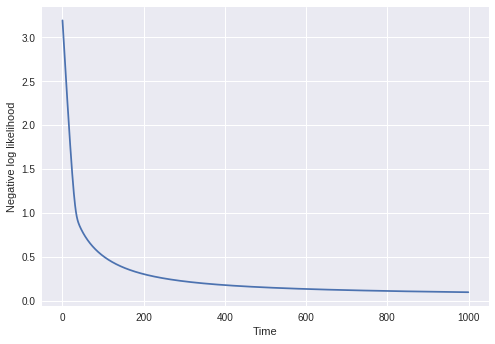

In [74]:
plt.plot(loss)
plt.ylabel("Negative log likelihood")
plt.xlabel("Time")
plt.show()

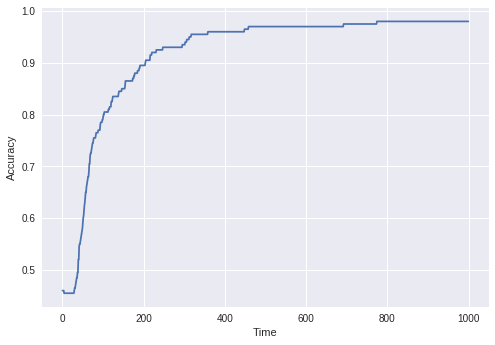

Final accuracy = 0.980000


In [79]:
plt.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Time")
plt.show()
print("Final accuracy = %f"%acc[-1])

## Decision Boundary

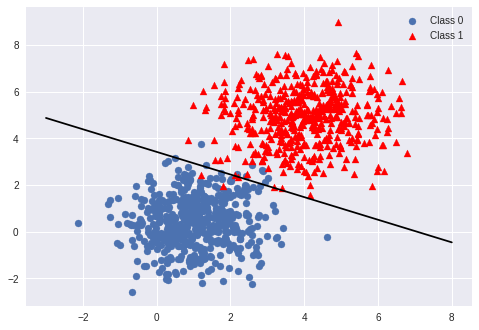

In [85]:
plt.scatter(dist_01[:,0], dist_01[:,1], label="Class 0")
plt.scatter(dist_02[:,0], dist_02[:,1], label="Class 1", color="red", marker="^")
# line = w1x1 + w2x2 + b
x1_line = np.linspace(-3,8,20)
x2_line = -(W[0]*x1_line + B)/W[1]
plt.plot(x1_line, x2_line, color='k')
plt.legend()
plt.show()

In [86]:
print(W)
print(B)

[ 0.65318163  1.34805994]
-4.60415299553
